### Importaci√≥n de datos



In [3]:
import pandas as pd
# Se importan los datos para su manejo por tienda
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [8]:
# Pruebass de onsultar los datos y revisar datos dentro  de las bases de datos
# Agrupe el marco de datos por 'Lugar de Compra' y luego obtenga los productos √∫nicos para cada tienda.
products_per_store = tienda.groupby('Lugar de Compra')['Producto'].unique()

# Muestra el resultado
products_per_store


Lugar de Compra
Armenia          [Cubo m√°gico 8x8, Estufa, Bloques de construcc...
Barranquilla     [Cuerda para saltar, Sill√≥n, Cama king, Cama b...
Bogot√°           [Asistente virtual, Mu√±eca beb√©, Lavadora de r...
Bucaramanga      [Bal√≥n de baloncesto, Iphone 15, Dashboards co...
Cali             [Microondas, Bloques de construcci√≥n, Ciencia ...
Cartagena        [Juego de mesa, Lavavajillas, Bal√≥n de balonce...
C√∫cuta           [Sof√° reclinable, Tablet ABXY, Microondas, Das...
In√≠rida          [Guitarra el√©ctrica, Pandereta, Auriculares co...
Leticia          [Mu√±eca beb√©, Bal√≥n de baloncesto, Cama box, E...
Manizales        [Cuerda para saltar, Smart TV, Auriculares con...
Medell√≠n         [Mesa de comedor, Silla de oficina, Auriculare...
Neiva            [Kit de bancas, Mesa de centro, Armario, Olla ...
Pasto            [Mu√±eca beb√©, TV LED UHD 4K, Lavadora de ropa,...
Pereira          [Olla de presi√≥n, Set de vasos, Cuerda para sa...
Riohacha         [Mu√±eca beb√©, Auriculares, Mesa de centro, Cie...
Santa Marta      [Lavavajillas, Ajedrez de madera, Mesa de cent...
Soacha           [Vaso t√©rmico, Celular ABXY, Iphone 15, Cama k...
Valledupar           [Auriculares, Kit de bancas, Sof√° reclinable]
Villavicencio    [Cama box, Bloques de construcci√≥n, Cubo m√°gic...
Name: Producto, dtype: object

#1. An√°lisis de facturaci√≥n



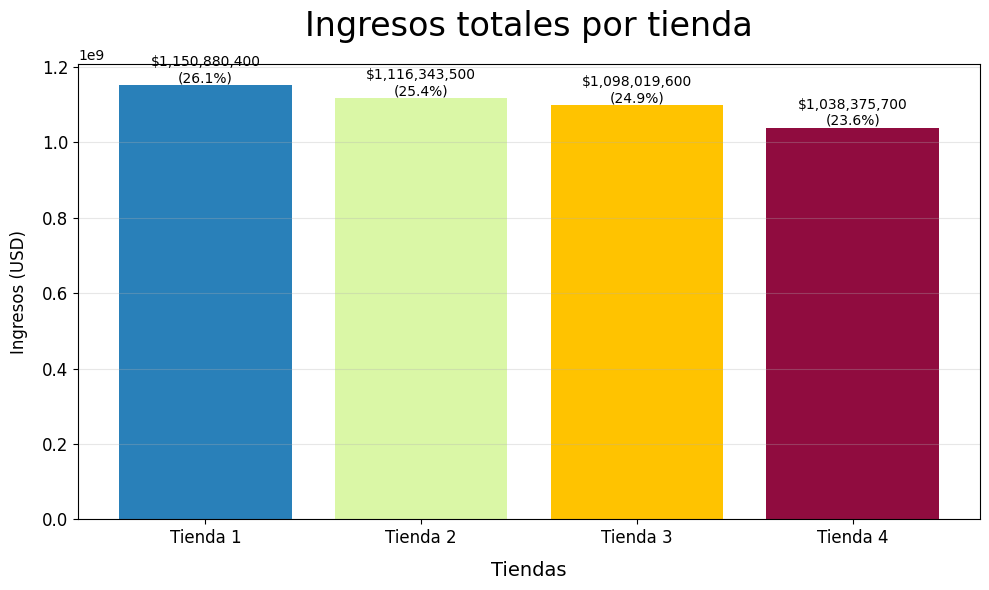

In [9]:
#Pandas como un Excel programable para manipular tablas de datos
#Matplolib como un pintor digitar  para crear  grafibos profesionales
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
# Facilita escalar a mas tiendas manteniedno el dodigo limpio
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer datos y calcular ingresos
ingresos = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    total = df['Precio'].sum()
    ingresos.append(total)

# Calcular porcentajes
total_general = sum(ingresos)
porcentajes = [(ingreso / total_general) * 100 for ingreso in ingresos]

# Configurar gr√°fico
nombres_tiendas = [f'Tienda {i+1}' for i in range(len(urls))]
plt.figure(figsize=(10, 6))
bars = plt.bar(nombres_tiendas, ingresos, color=['#2980b9', '#DAF7A6', '#FFC300', '#900C3F'])

# A√±adir etiquetas y porcentajes
for bar, porcentaje in zip(bars, porcentajes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}\n({porcentaje:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# Personalizar ejes y t√≠tulo
plt.title('Ingresos totales por tienda', fontsize=24, pad=20)
plt.xlabel('Tiendas', fontsize=14, labelpad=10)
plt.ylabel('Ingresos (USD)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Mostrar gr√°fico
plt.tight_layout()
plt.show()

In [11]:
tienda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
# se importan librerias para hacer pruebas

In [14]:
tiendas=[tienda,tienda2,tienda3, tienda4]
tiendas
# Nos da un panorama geneal de las tiendas en bruto.

[               Producto Categor√≠a del Producto     Precio  Costo de env√≠o  \
 0     Asistente virtual           Electr√≥nicos   164300.0          6900.0   
 1       Mesa de comedor                Muebles   192300.0          8400.0   
 2         Juego de mesa               Juguetes   209600.0         15900.0   
 3            Microondas      Electrodom√©sticos   757500.0         41000.0   
 4      Silla de oficina                Muebles   335200.0         20200.0   
 ...                 ...                    ...        ...             ...   
 2354          Iphone 15           Electr√≥nicos  1284400.0         66600.0   
 2355          Impresora           Electr√≥nicos   282800.0         15300.0   
 2356      Juego de mesa               Juguetes   122900.0          7200.0   
 2357           Cama box                Muebles   691300.0         35000.0   
 2358         Smartwatch           Electr√≥nicos   195000.0          8600.0   
 
      Fecha de Compra         Vendedor Lugar de Compra 

In [ ]:
tiendas = pd.concat(tiendas)
tiendas

Producto   Categor√≠a del Producto    Precio  Costo de env√≠o  \
0      Asistente virtual             Electr√≥nicos  164300.0          6900.0   
1        Mesa de comedor                  Muebles  192300.0          8400.0   
2          Juego de mesa                 Juguetes  209600.0         15900.0   
3             Microondas        Electrodom√©sticos  757500.0         41000.0   
4       Silla de oficina                  Muebles  335200.0         20200.0   
...                  ...                      ...       ...             ...   
2353     Mesa de comedor                  Muebles  227700.0         12600.0   
2354    Silla de oficina                  Muebles  342000.0         18600.0   
2355        Vaso t√©rmico     Deportes y diversi√≥n   36700.0          2400.0   
2356        Set de ollas  Art√≠culos para el hogar  151800.0          8300.0   
2357  Cuerda para saltar     Deportes y diversi√≥n   11200.0          1300.0   

     Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0         16/01/2021      Pedro Gomez          Bogot√°             4   
1         18/05/2022  Beatriz Morales        Medell√≠n             1   
2         15/03/2021   Juan Fernandez       Cartagena             1   
3         03/05/2022   Juan Fernandez            Cali             4   
4         07/11/2020    Maria Alfonso        Medell√≠n             5   
...              ...              ...             ...           ...   
2353      12/02/2020    Camila Rivera        Medell√≠n             5   
2354      17/05/2022    Felipe Santos     Bucaramanga             5   
2355      03/05/2022    Camila Rivera          Bogot√°             5   
2356      15/06/2020   Blanca Ramirez            Cali             5   
2357      17/11/2021    Felipe Santos          Bogot√°             5   

          M√©todo de pago  Cantidad de cuotas       lat       lon  
0     Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1     Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2     Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3                  Nequi                   1   3.43722 -76.52250  
4                  Nequi                   1   6.25184 -75.56359  
...                  ...                 ...       ...       ...  
2353  Tarjeta de cr√©dito                   1   6.25184 -75.56359  
2354  Tarjeta de cr√©dito                   3   7.12539 -73.11980  
2355  Tarjeta de cr√©dito                   1   4.60971 -74.08175  
2356  Tarjeta de cr√©dito                   1   3.43722 -76.52250  
2357  Tarjeta de cr√©dito                   1   4.60971 -74.08175  

[9435 rows x 12 columns]

In [15]:
import matplotlib

In [16]:
import matplotlib.pyplot as plt

# 2. Ventas por categor√≠a

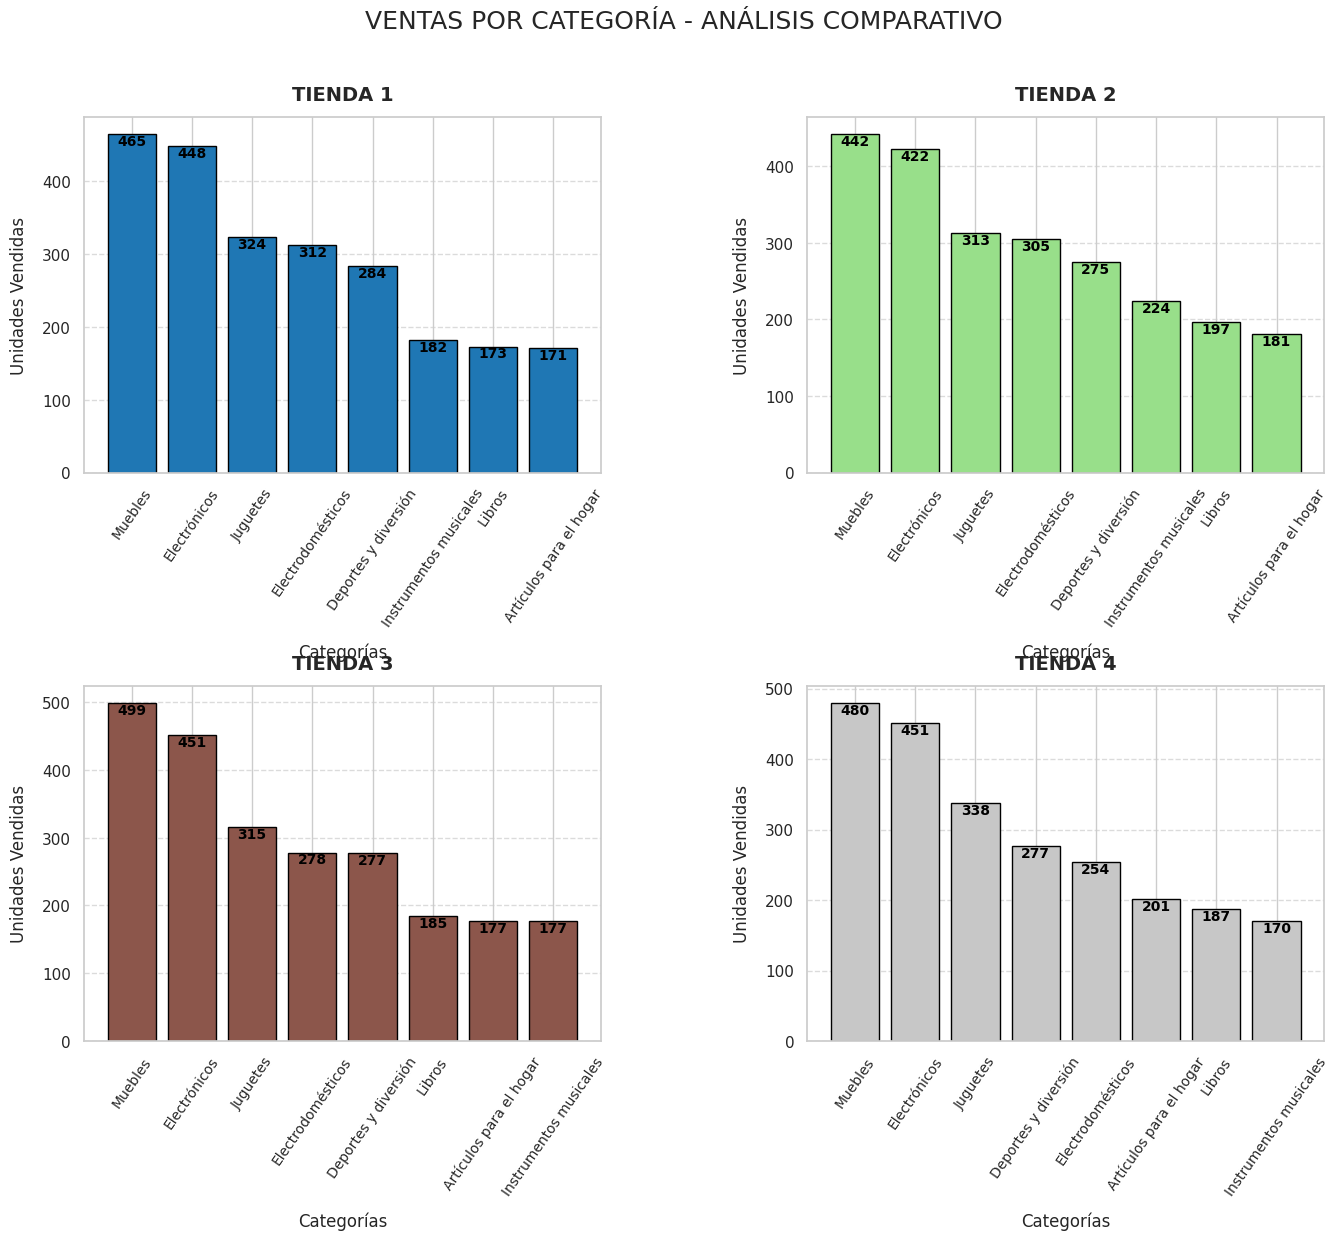

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuraci√≥n mejorada
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Verificar nombres de columnas
def verificar_columnas(df):
    print("Columnas disponibles en el DataFrame:")
    print(df.columns.tolist())
    return 'Categor√≠a' in df.columns  # Modificar seg√∫n necesidad

# Procesamiento seguro
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
fig.suptitle('VENTAS POR CATEGOR√çA - AN√ÅLISIS COMPARATIVO', fontsize=18, y=0.97)

for i, url in enumerate(urls):
    try:
        df = pd.read_csv(url if url.startswith('http') else f'https://{url}')

        # Verificaci√≥n y limpieza de columnas
        df.columns = df.columns.str.strip()  # Elimina espacios en nombres de columnas
        columna_categoria = 'Categor√≠a del Producto'  # Nombre exacto verificado

        if columna_categoria not in df.columns:
            verificar_columnas(df)
            raise KeyError(f"Columna '{columna_categoria}' no encontrada")

        # Agrupaci√≥n segura
        ventas_por_categoria = (
            df.groupby(columna_categoria, observed=True)
            .size()
            .sort_values(ascending=False)
            .reset_index(name='Ventas')
        )

        # Configuraci√≥n de gr√°fico
        ax = axs[i//2, i%2]
        bars = ax.bar(
            ventas_por_categoria[columna_categoria],
            ventas_por_categoria['Ventas'],
            color=plt.cm.tab20(i/len(urls)),
            edgecolor='black'
        )

        # Personalizaci√≥n
        ax.set_title(f'TIENDA {i+1}', fontsize=14, fontweight='bold', pad=12)
        ax.set_xlabel('Categor√≠as', fontsize=12, labelpad=10)
        ax.set_ylabel('Unidades Vendidas', fontsize=12, labelpad=10)
        ax.tick_params(axis='x', rotation=55, labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Etiquetas inteligentes
        max_ventas = ventas_por_categoria['Ventas'].max()
        for bar in bars:
            height = bar.get_height()
            va = 'bottom' if height < 0.2*max_ventas else 'top'
            color = 'black' if height < 0.2*max_ventas else 'black'
            ax.text(bar.get_x() + bar.get_width()/2, height,
                    f'{height}',
                    ha='center', va=va, color=color,
                    fontsize=10, fontweight='bold')

    except Exception as e:
        print(f"Error en Tienda {i+1}: {str(e)}")
        axs[i//2, i%2].axis('off')  # Desactiva el subplot con error

plt.show()

# 3. Calificaci√≥n promedio de la tienda


<ipython-input-22-be77983bf899>:72: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


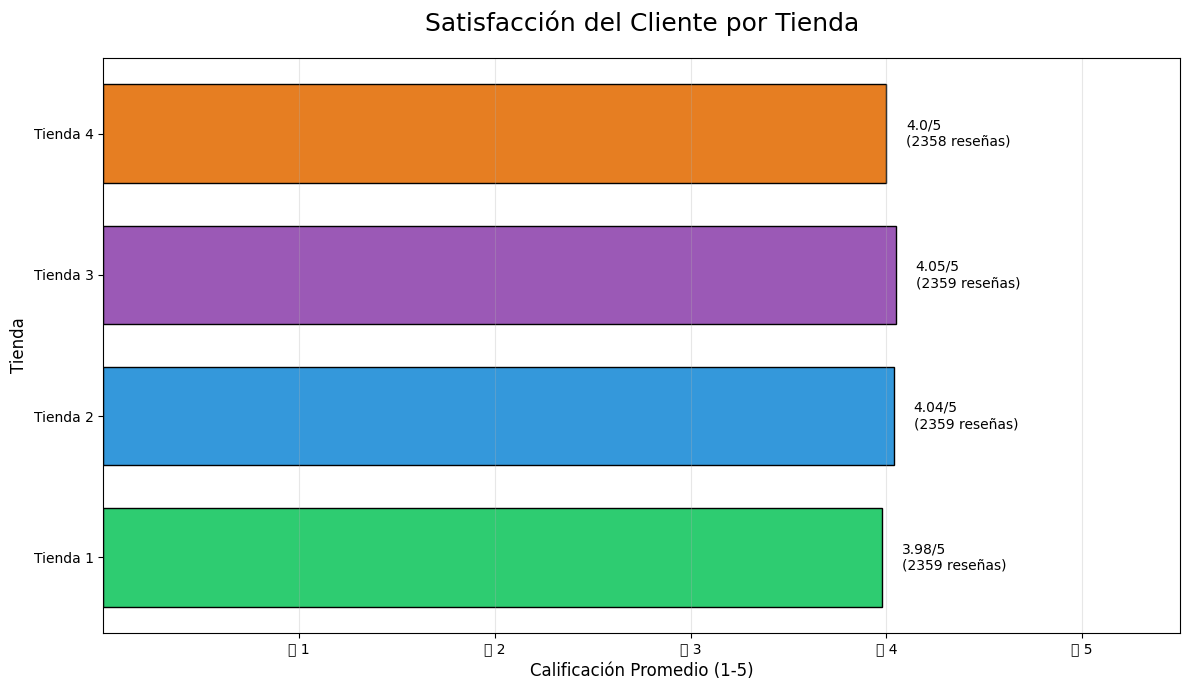

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuraci√≥n inicial
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Paleta de colores y configuraci√≥n
COLORES = ['#2ecc71', '#3498db', '#9b59b6', '#e67e22']
ESCALA_CALIFICACION = [1, 2, 3, 4, 5]

def verificar_columna_calificacion(df):
    if 'Calificaci√≥n' not in df.columns:
        print(f"Columnas disponibles: {df.columns.tolist()}")
        raise KeyError("La columna 'Calificaci√≥n' no existe en el dataset")

# Procesamiento principal
calificaciones = []
n_rese√±as = []

for i, url in enumerate(urls, 1):
    try:
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip()  # Normalizar nombres
        verificar_columna_calificacion(df)

        # Limpieza y validaci√≥n
        df['Calificaci√≥n'] = pd.to_numeric(df['Calificaci√≥n'], errors='coerce')
        df_clean = df.dropna(subset=['Calificaci√≥n'])
        df_clean = df_clean[(df_clean['Calificaci√≥n'] >= 1) & (df_clean['Calificaci√≥n'] <= 5)]

        # C√°lculos
        promedio = round(df_clean['Calificaci√≥n'].mean(), 2)
        calificaciones.append(promedio)
        n_rese√±as.append(len(df_clean))

    except Exception as e:
        print(f"Error en Tienda {i}: {str(e)}")
        calificaciones.append(np.nan)
        n_rese√±as.append(0)

# Creaci√≥n del gr√°fico
plt.figure(figsize=(12, 7))
bars = plt.barh(
    [f'Tienda {i+1}' for i in range(len(urls))],
    calificaciones,
    color=COLORES,
    edgecolor='black',
    height=0.7
)

# Personalizaci√≥n avanzada
plt.title('Satisfacci√≥n del Cliente por Tienda', fontsize=18, pad=20)
plt.xlabel('Calificaci√≥n Promedio (1-5)', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.xlim(0, 5.5)
plt.xticks(ESCALA_CALIFICACION, [f'‚≠ê {i}' for i in ESCALA_CALIFICACION], fontsize=10)
plt.grid(axis='x', alpha=0.3)

# Anotaciones de datos
for bar, promedio, n in zip(bars, calificaciones, n_rese√±as):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{promedio}/5\n({n} rese√±as)',
             va='center', ha='left', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

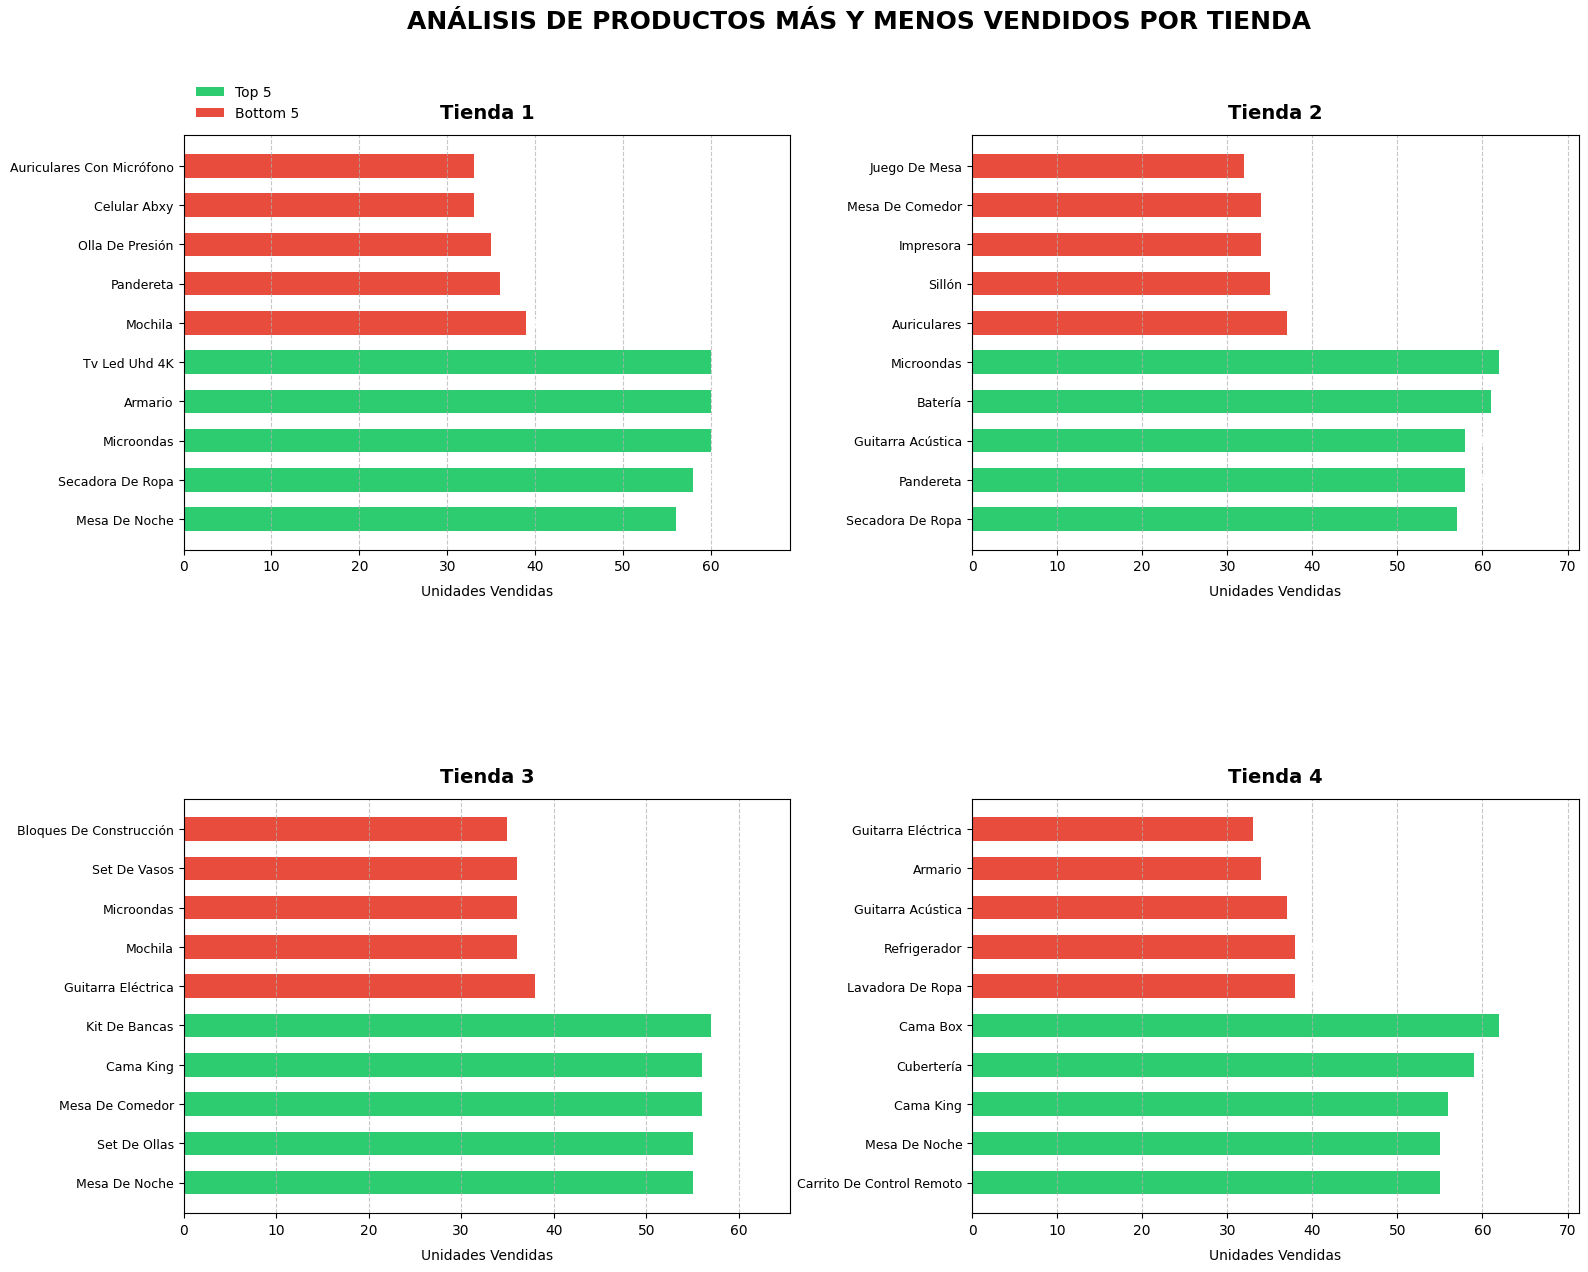

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuraci√≥n mejorada de URLs
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Configurar figura principal
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plt.subplots_adjust(hspace=0.6, wspace=0.3)
fig.suptitle('AN√ÅLISIS DE PRODUCTOS M√ÅS Y MENOS VENDIDOS POR TIENDA',
            fontsize=18, y=0.97, fontweight='bold')

# Paleta de colores profesional
COLORES = {'top': '#2ecc71', 'bottom': '#e74c3c'}
KEYWORDS_FILTER = ['programaci√≥n', 'ciencia de datos', 'python', 'iniciando', 'tutorial','Dashboards','Pover Bi']

for i, url in enumerate(urls):
    ax = axs[i//2, i%2]
    try:
        # 1. Carga y limpieza inicial
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip().str.title()

        # 2. Verificar columna cr√≠tica
        columna_producto = 'Producto'
        if columna_producto not in df.columns:
            raise KeyError(f"Columna '{columna_producto}' no encontrada")

        # 3. Limpieza avanzada de datos
        df_clean = df.copy()

        # Eliminar filas con metadatos y encabezados
        df_clean = df_clean[
            ~df_clean[columna_producto].str.contains('|'.join(KEYWORDS_FILTER), case=False, na=False)
            & (df_clean[columna_producto] != columna_producto)  # Encabezados duplicados
            & (df_clean[columna_producto].notna())
        ]

        # Normalizaci√≥n de texto
        df_clean[columna_producto] = (
            df_clean[columna_producto]
            .str.strip()
            .str.replace(r'\s+', ' ', regex=True)
            .str.title()
        )

        # 4. Calcular ventas por producto
        ventas = (
            df_clean.groupby(columna_producto, observed=True)
            .size()
            .reset_index(name='Ventas')
            .sort_values('Ventas', ascending=False)
        )

        # 5. Manejo de casos especiales
        if ventas.empty:
            raise ValueError("No hay datos v√°lidos despu√©s de la limpieza")

        # 6. Preparar datos para gr√°fico
        top = ventas.head(5).sort_values('Ventas', ascending=True)
        bottom = ventas.tail(5).sort_values('Ventas', ascending=False)

        # 7. Crear gr√°fico combinado
        ax.barh(top[columna_producto], top['Ventas'],
               color=COLORES['top'], label='Top 5', height=0.6)
        ax.barh(bottom[columna_producto], bottom['Ventas'],
               color=COLORES['bottom'], label='Bottom 5', height=0.6)

        # 8. Personalizaci√≥n del gr√°fico
        max_ventas = ventas['Ventas'].max()
        ax.set_title(f'Tienda {i+1}', fontsize=14, pad=12, fontweight='semibold')
        ax.set_xlabel('Unidades Vendidas', fontsize=10, labelpad=8)
        ax.set_xlim(0, max_ventas * 1.15)
        ax.tick_params(axis='y', labelsize=9)
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # 9. Etiquetas inteligentes
        for rect in ax.patches:
            width = rect.get_width()
            color = 'black' if width < max_ventas * 0.3 else 'white'
            ax.annotate(f'{width}',
                        xy=(width, rect.get_y() + rect.get_height()/2),
                        xytext=(3, 0),
                        textcoords="offset points",
                        ha='left', va='center',
                        fontsize=8, color=color, weight='bold')

        # 10. Leyenda unificada
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1.15), loc='upper left',
                     frameon=False, fontsize=10)

    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}",
               ha='center', va='center', color='red')
        ax.set_title(f'Tienda {i+1} - Error', color='red')
        ax.axis('off')

plt.show()

# 5. Env√≠o promedio por tienda

In [25]:
!pip install matplotlib --upgrade


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.6/8.6 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


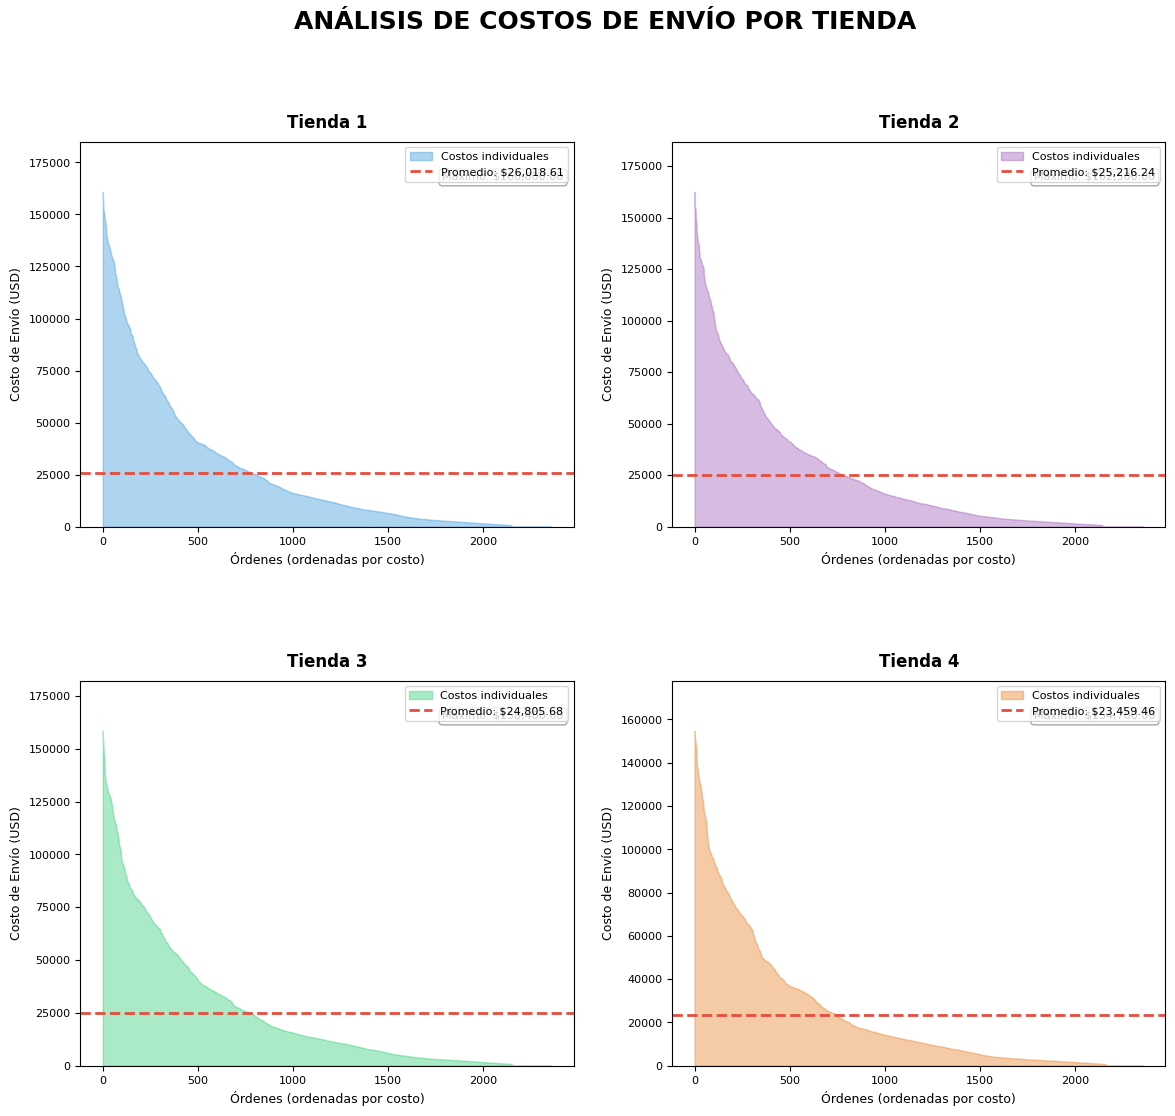

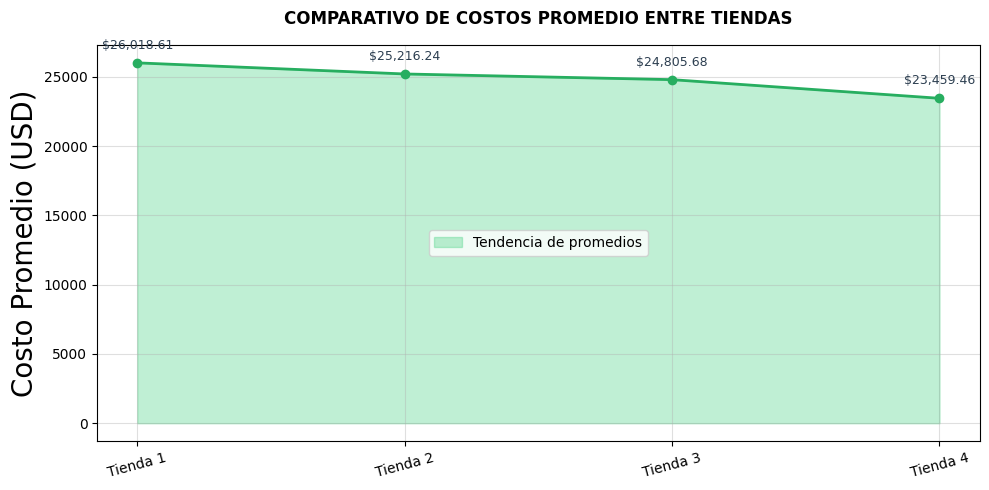

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuraci√≥n mejorada de URLs
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",  # <- Notar %20
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Configurar figura y estilo
plt.style.use
fig, axs = plt.subplots(2,2 , figsize=(14, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle('AN√ÅLISIS DE COSTOS DE ENV√çO POR TIENDA',
            fontsize=18, y=0.99, fontweight='bold')

# Paleta de colores y par√°metros
COLORES = ['#3498db', '#9b59b6', '#2ecc71', '#e67e22']
METRICAS = { }

for i, url in enumerate(urls):
    ax = axs[i//2, i%2]
    try:
        # Carga y limpieza de datos
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip().str.title()

        # Verificar columna cr√≠tica
        columna_envio = 'Costo De Env√≠o'
        if columna_envio not in df.columns:
            raise KeyError(f"Columna '{columna_envio}' no encontrada")

        # Limpieza y conversi√≥n num√©rica
        df[columna_envio] = pd.to_numeric(
            df[columna_envio],
            errors='coerce'
        ).fillna(0)

        # C√°lculo de m√©tricas
        promedio = df[columna_envio].mean()
        max_envio = df[columna_envio].max()
        min_envio = df[columna_envio].min()

        # Ordenar por costo de env√≠o
        df = df.sort_values(by=columna_envio, ascending=False)

        # Almacenar m√©tricas para visualizaci√≥n final
        METRICAS[f'Tienda {i+1}'] = {
            'Promedio': promedio,
            'M√°ximo': max_envio,
            'Datos': df[columna_envio]
        }

        # Crear gr√°fico de √°rea
        datos_ordenados = df[columna_envio].sort_values(ascending=False).reset_index(drop=True)
        ax.fill_between(
            datos_ordenados.index,
            datos_ordenados.values,
            color=COLORES[i],
            alpha=0.4,
            label='Costos individuales'
        )

        # L√≠nea de promedio
        ax.axhline(
            promedio,
            color='#e74c3c',
            linestyle='--',
            linewidth=2,
            label=f'Promedio: ${promedio:,.2f}'
        )

        # Personalizaci√≥n
        ax.set_title(f'Tienda {i+1}', fontsize=12, pad=10, fontweight='semibold')
        ax.set_xlabel('√ìrdenes (ordenadas por costo)', fontsize=9)
        ax.set_ylabel('Costo de Env√≠o (USD)', fontsize=9)
        ax.tick_params(axis='both', labelsize=8)
        ax.set_ylim(0, max_envio * 1.15)
        ax.legend(loc='upper right', fontsize=8)

        # Etiqueta de m√°ximo
        ax.annotate(f'M√°ximo: ${max_envio:,.2f}',
                   xy=(0.98, 0.92),
                   xycoords='axes fraction',
                   ha='right', va='top',
                   fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='grey', alpha=0.7))

    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}",
               ha='center', va='center', color='red')
        ax.set_title(f'Tienda {i+1} - Error', color='red')
        ax.axis('off')

# Gr√°fico comparativo adicional
fig2, ax2 = plt.subplots(figsize=(10, 5))
promedios = [v['Promedio'] for v in METRICAS.values()]
tiendas = list(METRICAS.keys())

ax2.fill_between(
    tiendas,
    promedios,
    color='#2ecc71',
    alpha=0.3,
    label='Tendencia de promedios'
)
ax2.plot(tiendas, promedios, marker='o', color='#27ae60', linewidth=2)

for i, (tienda, prom) in enumerate(zip(tiendas, promedios)):
    ax2.annotate(f'${prom:,.2f}',
                xy=(i, prom),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                color='#2c3e50')

ax2.set_title('COMPARATIVO DE COSTOS PROMEDIO ENTRE TIENDAS', pad=15, fontweight='bold')
ax2.set_ylabel('Costo Promedio (USD)', fontsize=20)
ax2.tick_params(axis='x', rotation=15)
ax2.grid(True, alpha=0.4)
ax2.legend()

plt.tight_layout()
plt.show()

# **6.  An√°lisis del desempe√±o geogr√°fico**


üîç Procesando Tienda 1
üìä Datos v√°lidos: 2279 registros


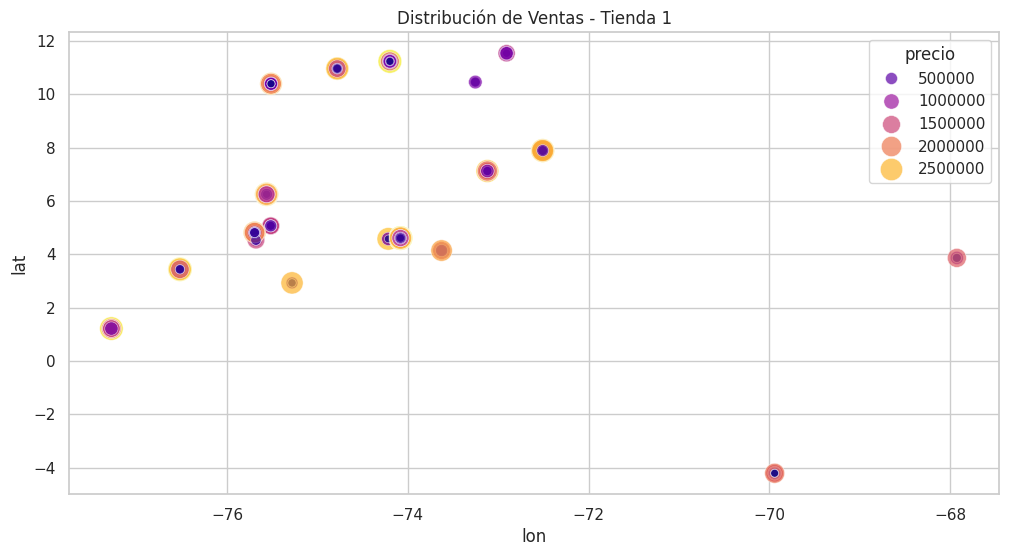


üîç Procesando Tienda 2
üìä Datos v√°lidos: 2251 registros


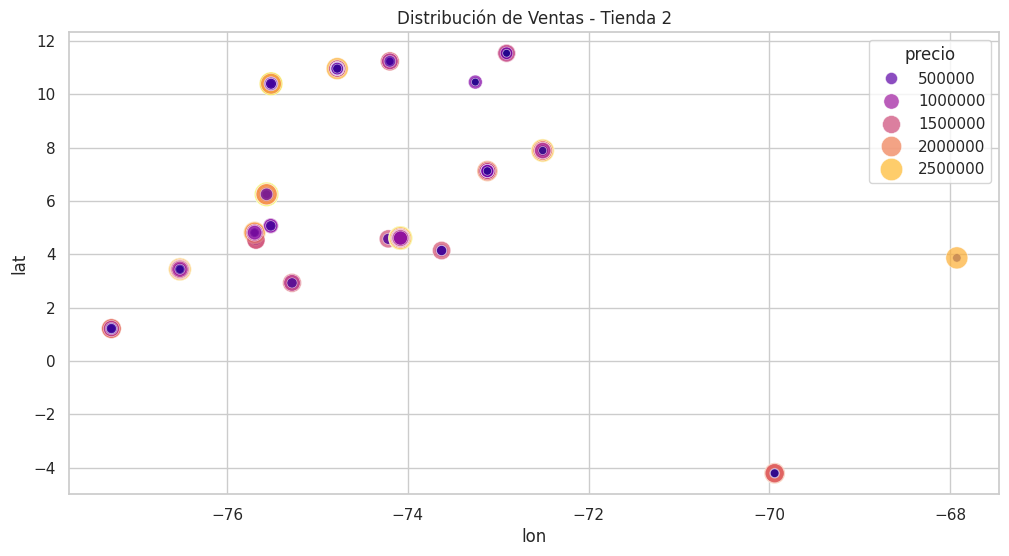


üîç Procesando Tienda 3
üìä Datos v√°lidos: 2267 registros


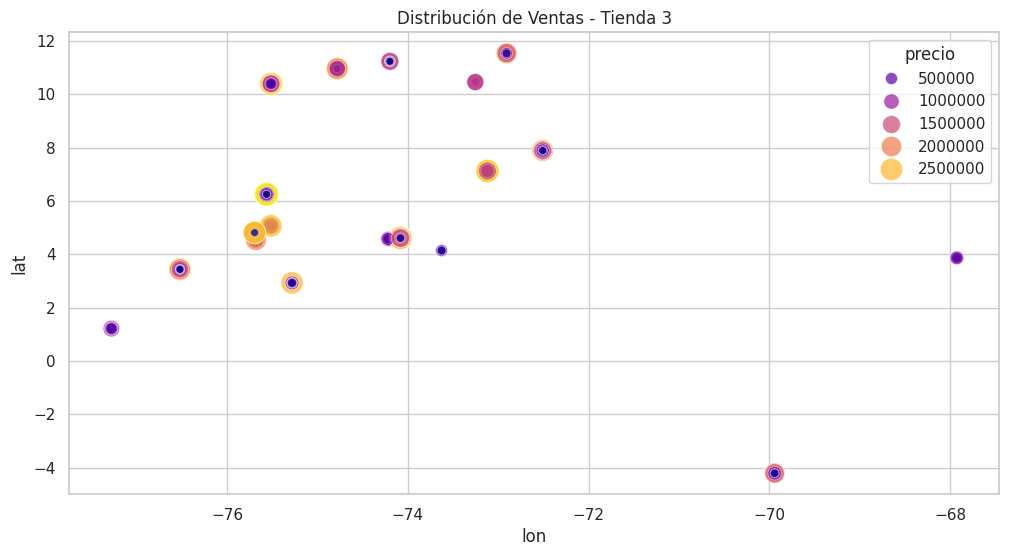


üîç Procesando Tienda 4
üìä Datos v√°lidos: 2277 registros


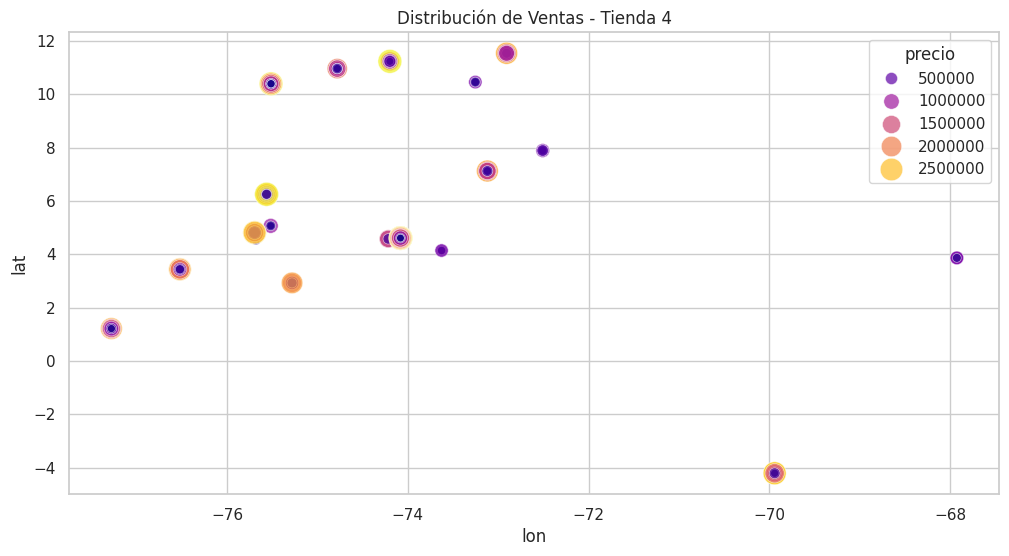

In [66]:
!pip install folium seaborn matplotlib --upgrade
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, folium, numpy as np
from folium.plugins import HeatMap
from IPython.display import display, HTML

# ========== CAMBIO 1: Configurar backend de matplotlib ==========
%matplotlib inline

# Configuraci√≥n
CONFIG = {
    'urls': [
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
    ],
    'filtros': {
        'keywords': ['programaci√≥n', 'ciencia de datos', 'python', 'tutorial'],
        'rango_lat': (-90, 90),
        'rango_lon': (-180, 180)
    },
    'visualizacion': {
        'heatmap_radius': 15,
        'top_marcadores': 5,
        'paleta_colores': 'plasma',
        'tiles': 'CartoDB dark_matter'
    }
}

# Funciones
def cargar_datos(url):
    try:
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip().str.lower()

        # Validaci√≥n de columnas
        if not {'lat', 'lon', 'precio', 'producto'}.issubset(df.columns):
            raise ValueError("Columnas cr√≠ticas faltantes")

        # Filtrado
        mask = (
            df['producto'].str.contains('|'.join(CONFIG['filtros']['keywords']), case=False, na=False) |
            ~df['lat'].between(*CONFIG['filtros']['rango_lat']) |
            ~df['lon'].between(*CONFIG['filtros']['rango_lon'])
        )
        df = df[~mask].copy()

        # Conversi√≥n num√©rica
        for col in ['lat', 'lon', 'precio']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        df = df.dropna(subset=['lat', 'lon', 'precio'])
        return df

    except Exception as e:
        print(f"üö® Error en {url}: {str(e)}")
        return pd.DataFrame()

def crear_mapa(df, tienda_num):
    if df.empty: return

    # ========== CAMBIO 2: Configuraci√≥n de mapa interactivo ==========
    mapa = folium.Map(
        location=[df['lat'].median(), df['lon'].median()],
        zoom_start=12,
        tiles=CONFIG['visualizacion']['tiles']
    )

    HeatMap(
        data=df[['lat', 'lon', 'precio']].values.tolist(),
        radius=CONFIG['visualizacion']['heatmap_radius'],
        gradient={'0.4': 'blue', '0.65': 'lime', '1': 'red'}
    ).add_to(mapa)

    # A√±adir marcadores
    for _, row in df.nlargest(CONFIG['visualizacion']['top_marcadores'], 'precio').iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=10,
            color='gold',
            fill=True,
            popup=f"${row['precio']:.2f} - {row['producto']}"
        ).add_to(mapa)

    # ========== CAMBIO 3: Mostrar mapa directamente en Colab ==========
    display(mapa)
    return mapa

def analisis_geo(df, tienda_num):
    if df.empty: return

    # Gr√°fico 1: Scatter plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        x='lon', y='lat',
        hue='precio', size='precio',
        data=df,
        palette=CONFIG['visualizacion']['paleta_colores'],
        sizes=(30, 300),
        alpha=0.7
    )
    plt.title(f'Distribuci√≥n de Ventas - Tienda {tienda_num}')
    plt.show()  # Forzar renderizado

    # Gr√°fico 2: Heatmap interactivo
    crear_mapa(df, tienda_num)

# Ejecuci√≥n
if __name__ == "__main__":
    for i, url in enumerate(CONFIG['urls'], 1):
        print(f"\n{'='*40}")
        print(f"üîç Procesando Tienda {i}")
        df = cargar_datos(url)

        if not df.empty:
            print(f"üìä Datos v√°lidos: {len(df)} registros")
            analisis_geo(df, i)
        else:
            print("‚ö†Ô∏è Sin datos para mostrar")